In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0,'/home/geoanton/Repos/unearthed-zinc')
from src.models.model import HistoricalMedian,XGBoost,LinearModel,RF,KNN,SVM


## Load data

In [2]:
df_tsfresh_feats = pd.read_csv('../data/processed/tsfresh_feats_every4.csv',parse_dates = ["id"])
df_tsfresh_feats_piv = pd.pivot(df_tsfresh_feats,index = 'id',columns = 'Unnamed: 0')
df_tsfresh_feats_piv.head()


value__abs_energy  \
Unnamed: 0                primary_cleaner.input.copper_sulfate   
id                                                               
2016-01-15 04:00:00+00:00                         16152.377193   
2016-01-15 08:00:00+00:00                         30073.585261   
2016-01-15 12:00:00+00:00                         47439.824148   
2016-01-15 16:00:00+00:00                         69327.513102   
2016-01-15 20:00:00+00:00                         91110.665212   

                                                            \
Unnamed: 0                primary_cleaner.input.depressant   
id                                                           
2016-01-15 04:00:00+00:00                       102.582358   
2016-01-15 08:00:00+00:00                       244.516532   
2016-01-15 12:00:00+00:00                       399.910646   
2016-01-15 16:00:00+00:00                       555.699203   
2016-01-15 20:00:00+00:00                       712.383602   

                                                           \
Unnamed: 0                primary_cleaner.input.feed_size   
id                                                          
2016-01-15 04:00:00+00:00                         52.5625   
2016-01-15 08:00:00+00:00                        105.1250   
2016-01-15 12:00:00+00:00                        157.6875   
2016-01-15 16:00:00+00:00                        210.2500   
2016-01-15 20:00:00+00:00                        262.8125   

                                                          \
Unnamed: 0                primary_cleaner.input.xanthate   
id                                                         
2016-01-15 04:00:00+00:00                       0.977644   
2016-01-15 08:00:00+00:00                       1.997480   
2016-01-15 12:00:00+00:00                       2.781653   
2016-01-15 16:00:00+00:00                       3.580734   
2016-01-15 20:00:00+00:00                       4.501241   

                                                                  \
Unnamed: 0                primary_cleaner.state.floatbank8_a_air   
id                                                                 
2016-01-15 04:00:00+00:00                           2.401805e+06   
2016-01-15 08:00:00+00:00                           4.966094e+06   
2016-01-15 12:00:00+00:00                           7.531441e+06   
2016-01-15 16:00:00+00:00                           1.010122e+07   
2016-01-15 20:00:00+00:00                           1.267083e+07   

                                                                    \
Unnamed: 0                primary_cleaner.state.floatbank8_a_level   
id                                                                   
2016-01-15 04:00:00+00:00                             2.489133e+05   
2016-01-15 08:00:00+00:00                             4.978898e+05   
2016-01-15 12:00:00+00:00                             7.474389e+05   
2016-01-15 16:00:00+00:00                             9.971676e+05   
2016-01-15 20:00:00+00:00                             1.247694e+06   

                                                                  \
Unnamed: 0                primary_cleaner.state.floatbank8_b_air   
id                                                                 
2016-01-15 04:00:00+00:00                           2.406948e+06   
2016-01-15 08:00:00+00:00                           4.971551e+06   
2016-01-15 12:00:00+00:00                           7.527727e+06   
2016-01-15 16:00:00+00:00                           1.008945e+07   
2016-01-15 20:00:00+00:00                           1.264262e+07   

                                                                    \
Unnamed: 0                primary_cleaner.state.floatbank8_b_level   
id                                                                   
2016-01-15 04:00:00+00:00                             2.666725e+05   
2016-01-15 08:00:00+00:00                             5.169959e+05   
2016-01-15 12:00:00+00:00                       

In [3]:
df_flat = df_tsfresh_feats_piv.copy()
df_flat.columns = ['_'.join(col).strip() for col in df_flat.columns.values]
df_flat.head()

,value__abs_energy_primary_cleaner.input.copper_sulfate,value__abs_energy_primary_cleaner.input.depressant,value__abs_energy_primary_cleaner.input.feed_size,value__abs_energy_primary_cleaner.input.xanthate,value__abs_energy_primary_cleaner.state.floatbank8_a_air,value__abs_energy_primary_cleaner.state.floatbank8_a_level,value__abs_energy_primary_cleaner.state.floatbank8_b_air,value__abs_energy_primary_cleaner.state.floatbank8_b_level,value__abs_energy_primary_cleaner.state.floatbank8_c_air,value__abs_energy_primary_cleaner.state.floatbank8_c_level,...,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank4_a_air,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank4_a_level,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank4_b_air,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank4_b_level,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank5_a_air,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank5_a_level,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank5_b_air,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank5_b_level,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank6_a_air,value__variance_larger_than_standard_deviation_secondary_cleaner.state.floatbank6_a_level
id,,,,,,,,,,,,,,,,,,,,,
2016-01-15 04:00:00+00:00,16152.377193,102.582358,52.5625,0.977644,2.401805e+06,2.489133e+05,2.406948e+06,2.666725e+05,2.402109e+06,2.486684e+05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-15 08:00:00+00:00,30073.585261,244.516532,105.1250,1.997480,4.966094e+06,4.978898e+05,4.971551e+06,5.169959e+05,4.960771e+06,4.995573e+05,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2016-01-15 12:00:00+00:00,47439.824148,399.910646,157.6875,2.781653,7.531441e+06,7.474389e+05,7.527727e+06,7.666856e+05,7.526180e+06,7.500425e+05,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2016-01-15 16:00:00+00:00,69327.513102,555.699203,210.2500,3.580734,1.010122e+07,9.971676e+05,1.008945e+07,1.016782e+06,1.007840e+07,9.996437e+05,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2016-01-15 20:00:00+00:00,91110.665212,712.383602,262.8125,4.501241,1.267083e+07,1.247694e+06,1.264262e+07,1.266580e+06,1.263456e+07,1.247861e+06,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [4]:
df_raw_feats = pd.read_csv('../data/processed/train_test_raw.csv',parse_dates=['date']).set_index('date')
df_raw_feats.head()

,primary_cleaner.input.copper_sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,hour,dow,day,month,weekofyear
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00+00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,-498.310211,8.079666,-500.470978,14.151341,-605.841980,0,4,0.483871,1,2
2016-01-15 01:00:00+00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,-500.169983,7.984757,-500.582168,13.998353,-599.787184,1,4,0.483871,1,2
2016-01-15 02:00:00+00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,-500.129135,8.013877,-500.517572,14.028663,-601.427363,2,4,0.483871,1,2
2016-01-15 03:00:00+00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,-499.201640,7.977324,-500.255908,14.005551,-599.996129,3,4,0.483871,1,2
2016-01-15 04:00:00+00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,-501.686727,7.894242,-500.356035,13.996647,-601.496691,4,4,0.483871,1,2


In [5]:
# Load target:
df_target = pd.read_csv(f'../data/interim/train_data/all_train.csv',parse_dates=['date'])[['date','rougher.output.recovery']].set_index('date')
df_target.head()



,rougher.output.recovery
date,
2016-01-15 00:00:00+00:00,87.107763
2016-01-15 01:00:00+00:00,86.843261
2016-01-15 02:00:00+00:00,86.842308
2016-01-15 03:00:00+00:00,87.226430
2016-01-15 04:00:00+00:00,86.688794


Pull the target, attach it to `df_flat`:

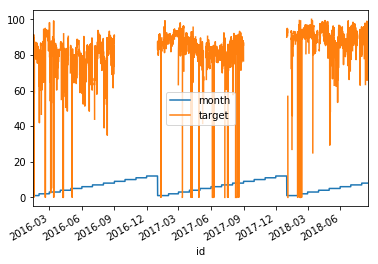

In [6]:
df_flat['target'] = df_target[['rougher.output.recovery']]
df_flat['month'] = df_flat.index.month
df_flat.plot(y=['month','target'])
df_flat = df_flat[~df_flat['target'].isna()]


X_train =df_flat[df_flat.month<7].drop(['target'],axis = 1)
X_test =df_flat[df_flat.month>=7].drop(['target'],axis = 1)

y_train =df_flat[df_flat.month<7]['target']
y_test =df_flat[df_flat.month>=7]['target']


# Build a ML model

In [7]:

model = XGBoost(X_train,y_train,X_test,y_test,params = {'nthread': -1,
                 'max_depth': 10,
                 'eta': 0.2,
                 'objective': 'reg:linear',
                 'colsample_bytree': 0.7,
                 'subsample': 0.7},num_round = 50,esr = 10)

[01:00:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[0]	train-rmse:67.0159	valid-rmse:68.4554
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[01:00:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[1]	train-rmse:53.9017	valid-rmse:55.4224
[01:00:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=10
[2]	train-rmse:43.448	valid-rmse:46.1706
[01:00:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=10
[3]	train-rmse:35.1426	valid-rmse:38.3533
[01:00:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[4]	train-rmse:28.4242	valid-rmse:32.3918
[01:00:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra node

(2657,)